## Anatomy of Neural Network

training a neural network:
* layers
* input data dna targets
* loss function
* optimizer

some layers are stateless, but more frequently layers have a state: the layer's weights. Different layers are appropriate for differnet tensor formats and different types of data processing. 

* 2D tensor(samples, features): often processed by densely connected layers(fully connected or dense layers) -> `Dense` class in keras
* 3D tensor, sequence data(samples, timesteps, features): typically processed by recurrent layers such as an `LSTM` layer.
* 4D tensor, image data: usually processed by a 2D convolution layer `Conv2D`

Building deep-learning models in Keras is done by clipping together compatible layers to form useful data-transformation pipelines.

* layer compatibility: every layer will only accespt input tensors of a certain shape and will return output tensors of a certain shape.

In [1]:
from keras import layers

/Users/teresazhang/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
layer = layers.Dense(32, input_shape=(784, ))

a layer accepting only 2D tensor where first dimension is 784, and retuning a tensor where first dimension has been transformed to 32.

Layers are dynamically built to match the shape of the incoming layer.

In [3]:
from keras import models
from keras import layers

In [4]:
model = models.Sequential()
model.add(layers.Dense(32, input_shape = (784, )))
model.add(layers.Dense(32))

the second layer did not receive an input shape, but it automatically inferred its input shape as the being the output shape of the layer that came before.

A deep-learning model is a directed, acyclic graph of layers. A variaty of network topologies:
* two-branch networks
* multihead networks
* inception blocks

The topology of a network defines a hypothesis space. By choosing a network topology, you contrain your `space of possibilities` (hypothesis space) to a specific series of tensor operations. Then search for a good set of values for the weight tensors involved in these tensor operations.

Once the network architecture is defined, one still have to choose loss function and optimizer.

A neural network that has multiple outputs may have multiple loss functions. But gradient-descent process must be based on a single scalar loss value, hence for multiloss networks, all lossed are combined into a single scalar quantity.

Guidlines for loss choice:
* binary classification: binary crossentropy
* multiclass classification: categorical crossentropy
* regression: mean squred error
* sequence-learning: connectionist temporal classification

Only when working on truly new research problem, will you have to develop your own objective function.

### Intro to Keras

<img src = 'keras.png'>

Typical Keras workflow:

__1.__ Define input tensors and target tensors
__2.__ Define a network of layers
__3.__ Configure the learning process: loss function, optimizer, monitor metric
__4.__ Iterate on training data by calling `fit()`

Two ways to define a model:
* using the `Sequential` 
    - only for linear stacks of layers
    - most common network architecture by far
* `functional API`
    - for directed acyclic graphs of layers
    - build completely arbitraty architecture

Two layer model using `Sequential` class:

In [6]:
from keras import models
from keras import layers

In [7]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape = (784, )))
model.add(layers.Dense(10, activation='softmax'))

Same model defined using the functional API:

In [9]:
input_tensor = layers.Input(shape = (784, ))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs = input_tensor, outputs = output_tensor)

With the functional API, you are manipulating the data tensors that the model processes and applying layers to this tensor as if they are functions.

Once model architecture is defined regardless which approach was used, the following is the same: compilation step, to specify the loss function, optimizer and metric to monitor during training.

In [10]:
from keras import optimizers

In [11]:
model.compile(optimizer=optimizers.RMSprop(lr = 0.001),
              loss = 'mse',
              metric=['accuracy'])

Finally, pass the Numpy arrays of input and target to the model via `fit()`.

In [13]:
#model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

### Deep-learning workstation

* recommend running deep-learning code on a modern NVIDIA GPU.
    - image processing with CNN (slow on CPU)
    - sequence processing with RNN (slow on CPU)
    - GPU is 5-10 times faster to CPU

### Classifying movie reviews

In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [3]:
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)

The argument `num_words=10000` means you will only keep the top 10000 most frequently occuring words in the training data. Rare words will be discarded. This allows you to work with vector data of manageable size.

In [14]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [15]:
train_label[0]

1

In [16]:
max([max(sequence) for sequence in train_data])

9999

In [17]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [20]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [23]:
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [24]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

`?` is replacement if not found by `get`

One can not feed lists of integers into a newral network. One has to turn the lists into tensors.
* pad lists so they have the same length and turn them into an integer tensor of shape `(sample, word_indices)`, then use as the first layer in network `(Embedding)`
* one-hot encode your lists to turn them into vectors of 0 and 1. Ex. turning `[3, 5]` into a 10000-dimensional vector would be all 0 except for indeces 3 and 5 which would be 1. Then use `Dense` layer as the first layer in your network.

In [25]:
import numpy as np

In [26]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [36]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [37]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [38]:
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

Vector input and scalar label is the easiest setup
* well performed network on such: simple stack of fully connected `(Dense)` layers with `relu` activation: `Dense(16, activation='relu)`
* `output = relu(dot(W, input)+b)` is the chain of tensor operations that `Dense` with `relu` activation implements.
* 16 is the number of hidden units of the layer. `W` has shape `(input_dimension, 16)` and projects the input data onto a 16-dimensional representation space.
* hidden unit(dimension of the representation space) is the freedom you are allowing the network to have when learning internal representations.
* more hidden units allows to learn more complex representations, but makes the network more computationally expensive and overfit.

stack of `Dense` layers:
* how many layers to use
* how may hidden units to choose for each layer

Activations:
Without activation function, all layers are linear transformation of the input data, not benefit from multiple layers of representations.
activation function add non-linearity to a much richer hypothesis space.
* `relu`: zero out negative values
* sigmoid: map arbitrary value into `[0,1]` as a probability


In [39]:
from keras import models
from keras import layers

In [40]:
x_train.shape

(25000, 10000)

In [41]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Crossentropy is a quantity from information theory that measures the distance between probability distribution, in this case, between the ground-truth distribution and your prediction.

In [42]:
model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [44]:
from keras import optimizers
from keras import losses
from keras import metrics

In [45]:
# model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
#               loss = losses.binary_crossentropy,
#               metrics = [metrics.binary_accuracy])

In [46]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [48]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Train model with:
- 20 epochs: 20 iterations overl all samples)
- mini bathes of 512 samples
- monitor loss and accuracy on train and val data set

In [49]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512, 
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 158us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3795 - val_acc: 0.8688
Epoch 2/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.3003 - acc: 0.9050 - val_loss: 0.3002 - val_acc: 0.8907
Epoch 3/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.2178 - acc: 0.9283 - val_loss: 0.3082 - val_acc: 0.8718
Epoch 4/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2838 - val_acc: 0.8834
Epoch 5/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.1425 - acc: 0.9542 - val_loss: 0.2848 - val_acc: 0.8869
Epoch 6/20
15000/15000 [==============================] - 3s 211us/step - loss: 0.1149 - acc: 0.9651 - val_loss: 0.3132 - val_acc: 0.8781
Epoch 7/20
15000/15000 [==============================] - 2s 162us/step - loss: 0.0978 - acc: 0.9709 - val_loss: 0.3128 - 

In [50]:
history_dict = history.history

In [51]:
history_dict.keys()

dict_keys(['acc', 'val_acc', 'loss', 'val_loss'])

In [52]:
import matplotlib.pyplot as plt

In [53]:
loss_value = history_dict['loss']
val_loss_value = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']

In [54]:
epochs = range(1, len(acc)+1)

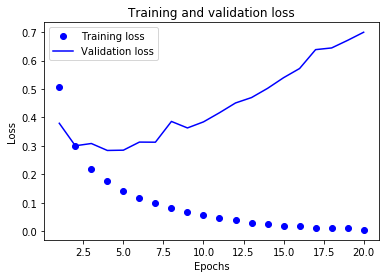

In [57]:
plt.plot(epochs, loss_value, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_value, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

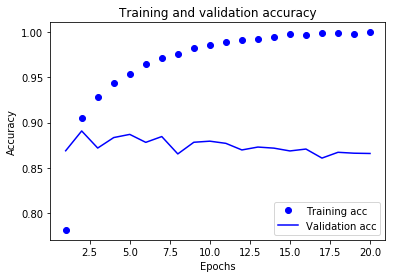

In [58]:
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [60]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 94us/step - loss: 0.4749 - acc: 0.8216
Epoch 2/4
25000/25000 [==============================] - 2s 68us/step - loss: 0.2654 - acc: 0.9100
Epoch 3/4
25000/25000 [==============================] - 2s 68us/step - loss: 0.1983 - acc: 0.9300
Epoch 4/4
25000/25000 [==============================] - 3s 107us/step


In [61]:
results

[0.32246052514076234, 0.87324]

In [62]:
model.predict(x_test)

array([[0.13812265],
       [0.999699  ],
       [0.3105671 ],
       ...,
       [0.07232741],
       [0.04400381],
       [0.4742041 ]], dtype=float32)

### Classifying newswires: multiclass classification

In [63]:
from keras.datasets import reuters

In [64]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2113536/2110848 [==============================] - 0s 0us/step


In [65]:
len(train_data)

8982

In [66]:
len(test_data)

2246

In [67]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [68]:
word_index = reuters.get_word_index()

557056/550378 [==============================] - 0s 0us/step


In [70]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [71]:
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [72]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [77]:
train_labels[111]

3

In [78]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

To vectorize the labels:
- cast the label list as an integer tensor
- one-hot encoding

In [79]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

In [80]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [82]:
# build-in way in Keras
from keras.utils.np_utils import to_categorical

In [83]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [84]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation = 'softmax'))


- end the network with a `Dense` layer of size 46, meaning the network will output a 46-dimensional vector for each input sample.
- `softmax` activation means the for every input sample, the network will produce a 46 dimensional output vector, where `output[i]` is the probability that the sample belongs to class `i`. The 46 scores will sum to 1.
- the best loss function to use in this case is `categorical_crossentropy` which measures the distance between the probability distribution output by the network and the trus distribution of the labels.

In [85]:
model.compile(optimizer = 'rmsprop', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [88]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [89]:
history = model.fit(partial_x_train,
                    partial_y_train, 
                    epochs = 20, 
                    batch_size = 512, 
                    validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 132us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 91us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 97us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 96us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 87us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 87us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 89us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9086 - val_acc: 0.8020
Epoch 

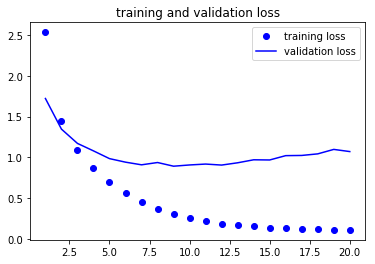

In [91]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

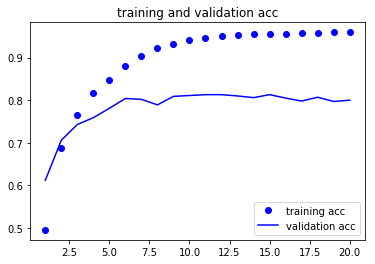

In [93]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation acc')
plt.legend()
plt.show()

In [95]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation = 'softmax'))
model.compile(optimizer = 'rmsprop', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [96]:
model.fit(partial_x_train, 
          partial_y_train, 
          epochs=9, 
          batch_size=512, 
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 144us/step - loss: 2.8046 - acc: 0.5038 - val_loss: 1.8434 - val_acc: 0.6300
Epoch 2/9
7982/7982 [==============================] - 1s 87us/step - loss: 1.5257 - acc: 0.6957 - val_loss: 1.3305 - val_acc: 0.7120
Epoch 3/9
7982/7982 [==============================] - 1s 93us/step - loss: 1.1115 - acc: 0.7707 - val_loss: 1.1392 - val_acc: 0.7460
Epoch 4/9
7982/7982 [==============================] - 1s 96us/step - loss: 0.8716 - acc: 0.8147 - val_loss: 1.0307 - val_acc: 0.7860
Epoch 5/9
7982/7982 [==============================] - 1s 97us/step - loss: 0.7029 - acc: 0.8480 - val_loss: 0.9683 - val_acc: 0.8020
Epoch 6/9
7982/7982 [==============================] - 1s 88us/step - loss: 0.5657 - acc: 0.8756 - val_loss: 0.9421 - val_acc: 0.7990
Epoch 7/9
7982/7982 [==============================] - 1s 90us/step - loss: 0.4561 - acc: 0.9075 - val_loss: 0.9247 - val_acc: 0.7960
Epoch 8/9
798

In [97]:
results = model.evaluate(x_test, one_hot_test_labels )

2246/2246 [==============================] - 0s 200us/step


In [98]:
results

[0.9791244390492766, 0.7885129117902007]

In [100]:
import copy

In [103]:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
np.mean(np.array(test_labels)==np.array(test_labels_copy))

0.19278717720391808

In [104]:
predictions = model.predict(x_test)

In [105]:
predictions[0].shape

(46,)

In [106]:
np.sum(predictions[0])

1.0000001

In [107]:
np.argmax(predictions[0])

3

In [108]:
predictions[0]

array([8.68172065e-05, 2.49567092e-05, 9.95539722e-07, 9.86129463e-01,
       1.01708276e-02, 6.17032697e-07, 2.43071099e-05, 2.38658340e-05,
       2.36309847e-04, 9.47996341e-06, 3.21389161e-05, 1.52547931e-04,
       4.23127422e-05, 7.35909271e-05, 2.43930317e-05, 9.80933419e-06,
       2.37570712e-04, 3.32976742e-06, 1.28056297e-06, 3.43364634e-04,
       6.90348330e-04, 6.01807318e-04, 2.44477724e-06, 1.30254150e-04,
       2.18991008e-05, 9.45661304e-06, 8.80687310e-07, 1.39793665e-05,
       4.45945352e-06, 3.03193101e-05, 2.35578209e-05, 2.47939839e-04,
       2.98812233e-06, 1.15535804e-05, 3.26905953e-04, 8.65814741e-07,
       3.09716343e-05, 6.46519266e-06, 1.59850479e-05, 1.60848067e-04,
       2.39593987e-07, 1.74150500e-05, 3.44476325e-06, 1.56511178e-05,
       1.20663543e-07, 1.22569509e-06], dtype=float32)

Another way to encode the labels: cast them as an integer tensor

In [109]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

The loss function `categorical_crossentropy` expects the labels to follow a categorical encoding.
With integer labels, need to use `sparse_categorical_crossentropy`

In [110]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation = 'softmax'))
model.compile(optimizer = 'rmsprop', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [111]:
model.fit(x_train, 
          y_train, 
          epochs=9, 
          batch_size=512, 
          validation_data=(x_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/9
8982/8982 [==============================] - 1s 137us/step - loss: 2.5201 - acc: 0.5499 - val_loss: 1.6700 - val_acc: 0.6483
Epoch 2/9
8982/8982 [==============================] - 1s 90us/step - loss: 1.3413 - acc: 0.7216 - val_loss: 1.2983 - val_acc: 0.7150
Epoch 3/9
8982/8982 [==============================] - 1s 85us/step - loss: 0.9991 - acc: 0.7904 - val_loss: 1.1343 - val_acc: 0.7596
Epoch 4/9
8982/8982 [==============================] - 1s 93us/step - loss: 0.7762 - acc: 0.8397 - val_loss: 1.0305 - val_acc: 0.7698
Epoch 5/9
8982/8982 [==============================] - 1s 98us/step - loss: 0.6137 - acc: 0.8753 - val_loss: 0.9759 - val_acc: 0.7769
Epoch 6/9
8982/8982 [==============================] - 1s 102us/step - loss: 0.4891 - acc: 0.8976 - val_loss: 0.9278 - val_acc: 0.7912
Epoch 7/9
8982/8982 [==============================] - 1s 91us/step - loss: 0.3925 - acc: 0.9177 - val_loss: 0.9263 - val_acc: 0.7979
Epoch 8/9
89

In [112]:
predictions = model.predict(x_test)

In [114]:
np.argmax(predictions[0])

3

Since the final output is 46-dimensional, one need to avoid intermediate layers with many fewer than 46 hidden units.

### Predicting house prices: a regression example

In [115]:
from keras.datasets import boston_housing

In [120]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [117]:
train_data.shape

(404, 13)

In [119]:
test_data.shape

(102, 13)

In [122]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [123]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

Since so few samples are available, you will use a very small network to avoid overfitting.

In [124]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1], )))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', 
                  loss='mse', 
                  metrics=['mae'])
    return model

The model ends with a single unit and no activation(linear layer). This is a typical setup for scalar regression. The network is free to learn to predict values in any range.

In [125]:
import numpy as np

In [131]:
k = 4
num_val_samples = len(train_data)//k
num_epochs = 100
all_scores = []

In [127]:
num_val_samples

101

In [128]:
train_data.shape

(404, 13)

In [132]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]
    partial_train_data = np.concatenate([train_data[:i*num_val_samples], 
                                         train_data[(i+1)*num_val_samples:]], 
                                        axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples], 
                                         train_targets[(i+1)*num_val_samples:]], 
                                          axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs = num_epochs,
             batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [136]:
all_scores

[2.009503201682969, 2.726189391447766, 2.6811949050072394, 2.366986774572051]

In [139]:
num_epochs = 500
all_mae_histories=[]
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]
    partial_train_data = np.concatenate([train_data[:i*num_val_samples], 
                                         train_data[(i+1)*num_val_samples:]], 
                                        axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples], 
                                         train_targets[(i+1)*num_val_samples:]], 
                                          axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs = num_epochs,
                        validation_data = (val_data, val_targets), 
                        batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [142]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [143]:
import matplotlib.pyplot as plt

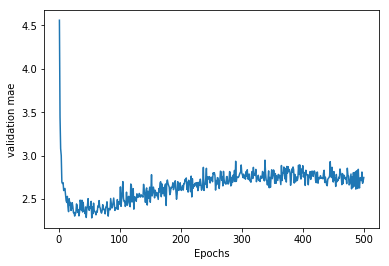

In [145]:
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('validation mae')
plt.show()

- omit the first 10 data points.
- replace each point with an exponential moving average of the previous points

In [146]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor+point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [147]:
smooth_mae_history = smooth_curve(average_mae_history[10:])

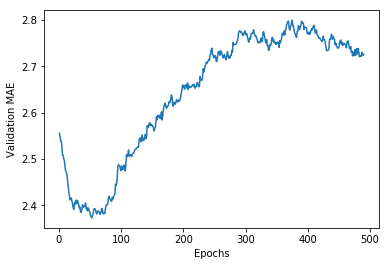

In [148]:
plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [150]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 2ms/step


In [151]:
test_mae_score

2.5579882696563123

- when data has features with different ranges, scale each feature independently as part of preprocessing
- if one does not have much training data, use a small network with only one or two hidden layer to avoid overfitting
- if data is divided into many categories, you may cause information bottlenecks if you make the intermediate layers too small(hidden unit < class number)
- regression use different loss function and evaluation metrics
- when working with little data, k fold validation can relizbly evaluate the model